In [1]:
import torch, pickle, argparse
import numpy as np, pytorch_lightning as pl, matplotlib.pyplot as plt, eagerpy as ep
from old_S2CNN_model import S2ConvNet
from data_loader import load_train_data, load_test_data
from foolbox import PyTorchModel, accuracy, samples
from foolbox.attacks import LinfProjectedGradientDescentAttack
from foolbox.attacks.base import Repeated
from tqdm.notebook import tqdm
from attack_helper import run_batched_attack_cpu, batched_accuracy

In [2]:
total = 6
bs = 6

In [3]:
filename = 'S2CNN_first_tests_smaller_training_sets.pickle'

with open(filename, 'rb') as file:
    loaded = pickle.load(file)
    
data = np.array(loaded)
hparams = argparse.Namespace(**data[1][1][1])


TEST_PATH = "s2_mnist_cs1.gz"
test_data = load_test_data(TEST_PATH)

images = test_data[:total][0]
labels = test_data[:total][1]


model = S2ConvNet(hparams, None, test_data).eval()
trainer = pl.Trainer(gpus=1, logger=False)
best_model = torch.load('checkpoints/epoch=17_v14.ckpt')
model.load_state_dict(best_model['state_dict'])

fmodel = PyTorchModel(model, bounds=(0, 255))

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
CUDA_VISIBLE_DEVICES: [0]


In [4]:
output = model(images.cuda())
clean_pred = torch.max(output, 1)[1]

load 0.pkl.gz... done
load 0.pkl.gz... done
load 0.pkl.gz... done
load 1.pkl.gz... done
load 0.pkl.gz... done
load 2.pkl.gz... done
load 3.pkl.gz... done
load 1.pkl.gz... done
load 4.pkl.gz... done
load 2.pkl.gz... done
load 5.pkl.gz... done
load 6.pkl.gz... done
load 3.pkl.gz... done
load 7.pkl.gz... done
load 4.pkl.gz... done
load 8.pkl.gz... done
load 9.pkl.gz... done
load 5.pkl.gz... done
load 10.pkl.gz... done


In [5]:
n_steps = [1, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
epsilons = [0.1, 0.5, 1, 5, 10, 20, 30, 50, 80, 100]
rel_stepsizes = [0.01, 0.01/0.3, 0.05]
random_starts = [False, True]
success = []

for random_start in random_starts:
    outer_dummy = []
    for rel_stepsize in rel_stepsizes:
        dummy = []
        for steps in n_steps:
            if random_start:
                attack = Repeated(LinfProjectedGradientDescentAttack(rel_stepsize=rel_stepsize, steps=steps, random_start=random_start), 3)
            else:
                attack = LinfProjectedGradientDescentAttack(rel_stepsize=rel_stepsize, steps=steps, random_start=random_start)
            raw_advs_cpu, clipped_advs_cpu, success_cpu = run_batched_attack_cpu(attack, fmodel, images, clean_pred, epsilons, bs)
            dummy.append(success_cpu.numpy())
        outer_dummy.append(dummy)
    success.append(outer_dummy)
    
success = torch.as_tensor(np.array(success))

success_rate = ep.astensor(success).float32().mean(axis=-1).raw

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

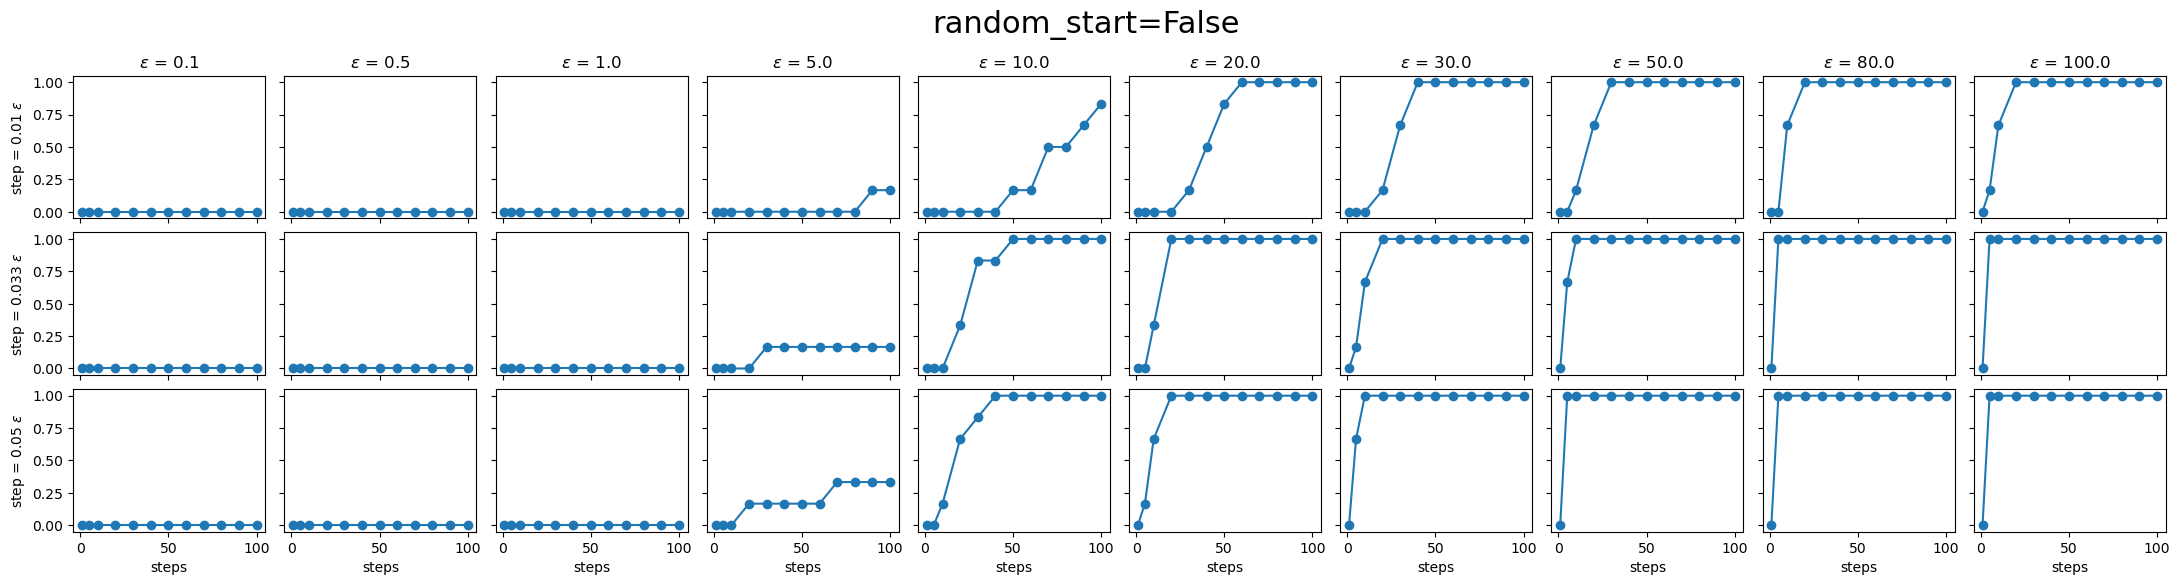

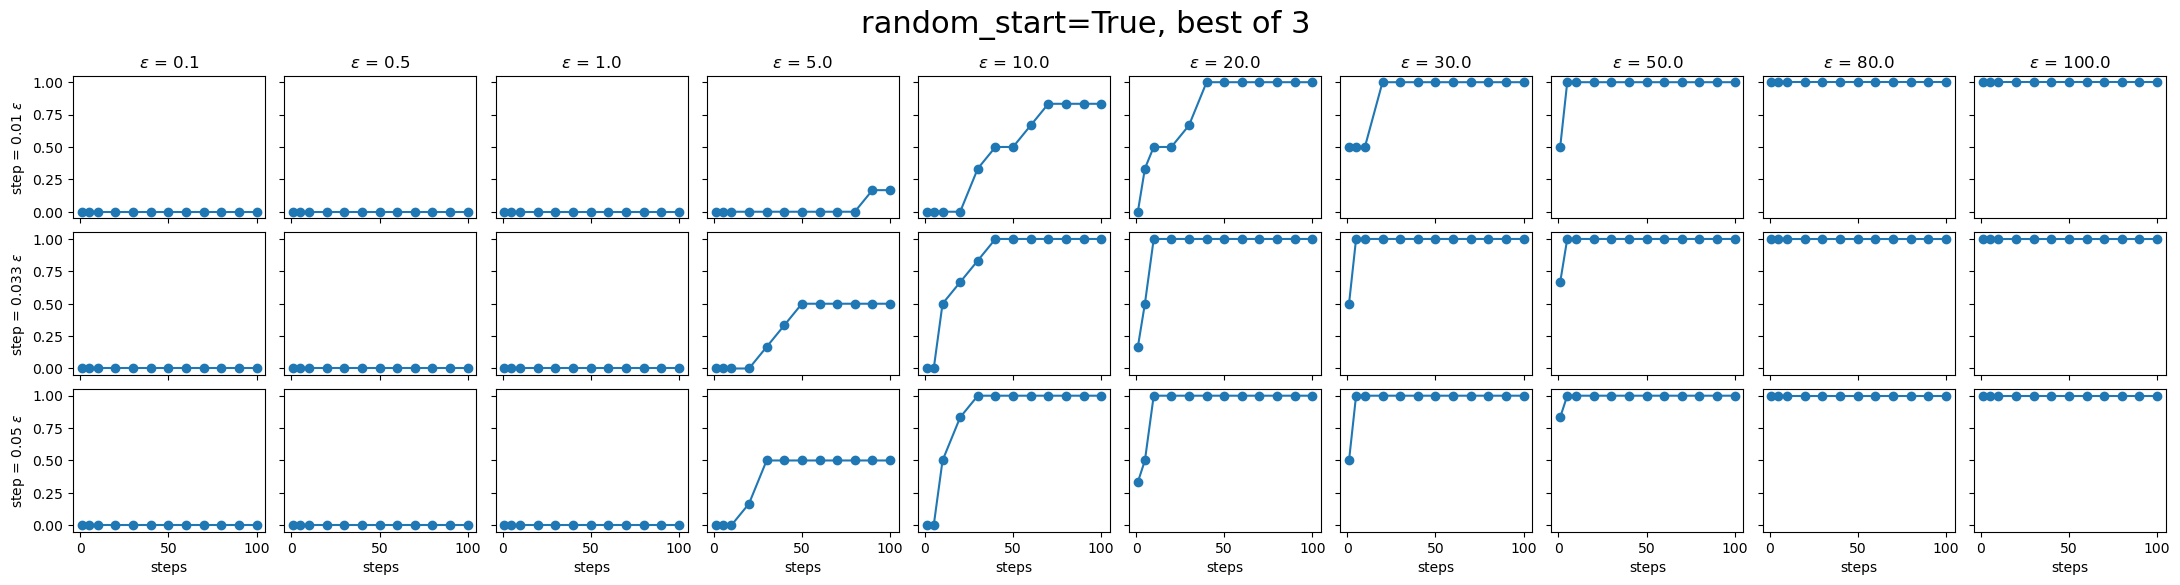

In [6]:
title_helper = ['', ', best of 3']
for k in range(2):
    fontsize = 50

    fig, axs = plt.subplots(nrows=3, ncols=10, figsize = (27, 6), sharey=True, sharex=True, gridspec_kw = {'wspace':0.1, 'hspace':0.1})
    fig.suptitle(f'random_start={str(random_starts[k])+title_helper[k]}', fontsize=22)
    plt.subplots_adjust(top=0.87)

    for j in range(success_rate.size(1)):
        for i in range(success_rate.size(3)):
            axs[j,i].plot(n_steps, success_rate[k,j,:,i], 'o-')
            axs[0,i].set_title(r'$\epsilon$ = %.1f' %(epsilons[i]))

        axs[j,0].set_ylabel(f'step = {rel_stepsizes[j]:{1}.{2}} $\epsilon$')
        
    for i in range(success_rate.size(3)):
        axs[2,i].set_xlabel('steps')

    plt.show()

choose: <br>
 - random_start = True
 - relative step size = 0.05
 - steps = 50
 - $\epsilon_{\mathrm{max}} \approx 10$